<a href="https://colab.research.google.com/github/ShauryaDusht/machine-learning-basics/blob/main/LAB8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks**

```
Aim : Implement 2 and 3 input Logic Gates using Neural Networks with and without
employing the libraries. Perform the quadratic function implementation task
using Neural Networks and validate various parameter optimisation techniques.
```

# Logic Gates

In [ ]:
from IPython.display import clear_output
!pip install torch
clear_output()

```
Aim: Implement 2 and 3 input Logic Gates using Neural Networks with and without
employing the libraries.
Perform the quadratic function implementation task using Neural Networks and
validate various parameter optimisation techniques
```

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return x * (1 - x)

def train(inputs, outputs, weights, bias, lr=0.1, epochs=10000):
    for epoch in range(1, epochs + 1):
        # Forward Pass
        z = np.dot(inputs, weights) + bias
        y_pred = sigmoid(z)

        # Loss calculation
        loss = np.mean((outputs - y_pred) ** 2)

        # Backpropagation
        error = outputs - y_pred
        d_error = error * derivative_sigmoid(y_pred)

        # Gradient Descent
        weights += lr * np.dot(inputs.T, d_error)
        bias += lr * np.sum(d_error)

        # Print loss every 1000 epochs
        if epoch % 2000 == 0 or epoch == 1:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights, bias

## OR Gate

In [ ]:
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
outputs = np.array([[0], [1], [1], [1]])

weights = np.random.rand(2,1)
bias = np.random.rand(1)
print(f"Weights before Training: {weights}\nBias before Training: {bias}")
preds = sigmoid(np.dot(inputs, weights) + bias)
print("Predictions before Training:", preds.round())
weigths, bias = train(inputs, outputs, weights, bias)
print(f"Weights after Training: {weights}\nBias after Training: {bias}")
final_preds = sigmoid(np.dot(inputs, weights) + bias)
print("Final Predictions:", final_preds.round())

Weights before Training: [[0.44517647]
 [0.2493108 ]]
Bias before Training: [0.87169105]
Predictions before Training: [[1.]
 [1.]
 [1.]
 [1.]]
Epoch 1, Loss: 0.15802595535347164
Epoch 2000, Loss: 0.008369668733755433
Epoch 4000, Loss: 0.003760594246787806
Epoch 6000, Loss: 0.0023793042745601494
Epoch 8000, Loss: 0.0017281867451001062
Epoch 10000, Loss: 0.001352309383857003
Weights after Training: [[6.17544862]
 [6.17542374]]
Bias after Training: [-2.84151399]
Final Predictions: [[0.]
 [1.]
 [1.]
 [1.]]


## AND Gate

In [ ]:
outputs = np.array([[0], [0], [0], [1]])

weights = np.random.rand(2,1)
bias = np.random.rand(1)

print(f"Weights before Training: {weights}\nBias before Training: {bias}")
preds = sigmoid(np.dot(inputs, weights) + bias)
print("Predictions before Training:", preds.round())
weigths, bias = train(inputs, outputs, weights, bias)
print(f"Weights after Training: {weights}\nBias after Training: {bias}")
final_preds = sigmoid(np.dot(inputs, weights) + bias)
print("Final Predictions:", final_preds.round())

Weights before Training: [[0.32609675]
 [0.53648958]]
Bias before Training: [0.09322334]
Predictions before Training: [[1.]
 [1.]
 [1.]
 [1.]]
Epoch 1, Loss: 0.28515295857333695
Epoch 2000, Loss: 0.015625581703721095
Epoch 4000, Loss: 0.007291931955947871
Epoch 6000, Loss: 0.004643785306053496
Epoch 8000, Loss: 0.003376249985334078
Epoch 10000, Loss: 0.0026405621711964125
Weights after Training: [[5.47943502]
 [5.47943502]]
Bias after Training: [-8.31184461]
Final Predictions: [[0.]
 [0.]
 [0.]
 [1.]]


Change the outputs and we can similarly implement the NAND and NOR gates

## 3-Input NAND Gate


In [ ]:
inputs = np.array([
    [0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]
    ])
outputs = np.array([[1],[1],[1],[1],[1],[1],[1],[0]])
weights = np.random.rand(3,1)
bias = np.random.rand(1)

print(f"Weights before Training: {weights}\nBias before Training: {bias}")
preds = sigmoid(np.dot(inputs, weights) + bias)
print("Predictions before Training:", preds.round())
weigths, bias = train(inputs, outputs, weights, bias)
print(f"Weights after Training: {weights}\nBias after Training: {bias}")
final_preds = sigmoid(np.dot(inputs, weights) + bias)
print("Final Predictions:", final_preds.round())

Weights before Training: [[0.74661707]
 [0.55184553]
 [0.7919931 ]]
Bias before Training: [0.10548085]
Predictions before Training: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Epoch 1, Loss: 0.17814246034238831
Epoch 2000, Loss: 0.020066817136942448
Epoch 4000, Loss: 0.009157095172194643
Epoch 6000, Loss: 0.005713586852514867
Epoch 8000, Loss: 0.004092651035937991
Epoch 10000, Loss: 0.0031656640619667194
Weights after Training: [[-4.74223409]
 [-4.74223409]
 [-4.74223409]]
Bias after Training: [12.09305367]
Final Predictions: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


## XOR Gate

In [ ]:
def train_xor(inputs, outputs, weights_1, bias_1, weights_2, bias_2, lr=0.1, epochs=20000):
    for epoch in range(1, epochs + 1):
        # Forward Pass
        z1 = np.dot(inputs, weights_1) + bias_1
        a1 = sigmoid(z1)

        z2 = np.dot(a1, weights_2) + bias_2
        y_pred = sigmoid(z2)

        # Loss calculation (Mean Squared Error)
        loss = np.mean((outputs - y_pred) ** 2)

        # Backpropagation
        error_output = outputs - y_pred
        d_output = error_output * derivative_sigmoid(y_pred)

        error_hidden = np.dot(d_output, weights_2.T)
        d_hidden = error_hidden * derivative_sigmoid(a1)

        # Gradient Descent
        weights_2 += lr * np.dot(a1.T, d_output)
        bias_2 += lr * np.sum(d_output, axis=0)

        weights_1 += lr * np.dot(inputs.T, d_hidden)
        bias_1 += lr * np.sum(d_hidden, axis=0)

        # Print loss every 4000 epochs
        if epoch % 4000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights_1, bias_1, weights_2, bias_2

def predict_xor(inputs, weights_1, bias_1, weights_2, bias_2):
    z1 = np.dot(inputs, weights_1) + bias_1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, weights_2) + bias_2
    y_pred = sigmoid(z2)
    return y_pred.round()

![XOR](https://th.bing.com/th/id/R.a80fc03c681b6e1d107d136c47231a26?rik=q26CNC%2bubUMRpw&riu=http%3a%2f%2fi.stack.imgur.com%2fnRZ6z.png&ehk=Cy%2b9H%2bxmlKLrQstZ9rDmAFu5onolzUDJyT25w8I4o4U%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1)

In [ ]:
# XOR input and output
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
outputs = np.array([[0], [1], [1], [0]])

weights_1 = np.random.randn(2,2) # there are 2 nodes
bias_1 = np.random.randn(2)

weights_2 = np.random.randn(2,1)
bias_2 = np.random.randn(1)

print(f"Weights 1 before Training: {weights_1}\nBias 1 before Training: {bias_1}")
print(f"Weights 2 before Training: {weights_2}\nBias 2 before Training: {bias_2}")

# Predictions before training
preds = predict_xor(inputs, weights_1, bias_1, weights_2, bias_2)
print(f"Predictions before Training: {preds}")

# Train the network
weights_1, bias_1, weights_2, bias_2 = train_xor(inputs, outputs, weights_1, bias_1, weights_2, bias_2)

print(f"Weights 1 after Training: {weights_1}\nBias 1 after Training: {bias_1}")
print(f"Weights 2 after Training: {weights_2}\nBias 2 after Training: {bias_2}")

# Predictions after training
final_preds = predict_xor(inputs, weights_1, bias_1, weights_2, bias_2)
print(f"Final Predictions: {final_preds}")

Weights 1 before Training: [[-0.33742211 -1.34719629]
 [ 1.11229166  1.42465642]]
Bias 1 before Training: [ 1.03297475 -2.4857726 ]
Weights 2 before Training: [[-0.53948484]
 [-1.07063388]]
Bias 2 before Training: [0.60615362]
Predictions before Training: [[1.]
 [0.]
 [1.]
 [1.]]
Epoch 4000, Loss: 0.019062484791831622
Epoch 8000, Loss: 0.003346477698551675
Epoch 12000, Loss: 0.0017263475455033708
Epoch 16000, Loss: 0.0011464272055815058
Epoch 20000, Loss: 0.0008529113431972673
Weights 1 after Training: [[-5.88248529 -5.44099292]
 [ 6.02039204  5.26546525]]
Bias 1 after Training: [ 2.99611616 -2.86078115]
Weights 2 after Training: [[-8.15927657]
 [ 8.61875935]]
Bias 2 after Training: [3.80510609]
Final Predictions: [[0.]
 [1.]
 [1.]
 [0.]]


# Quadratic Function

Epoch [100/500], Loss: 0.002879
Epoch [200/500], Loss: 0.000298
Epoch [300/500], Loss: 0.000117
Epoch [400/500], Loss: 0.000081
Epoch [500/500], Loss: 0.000070


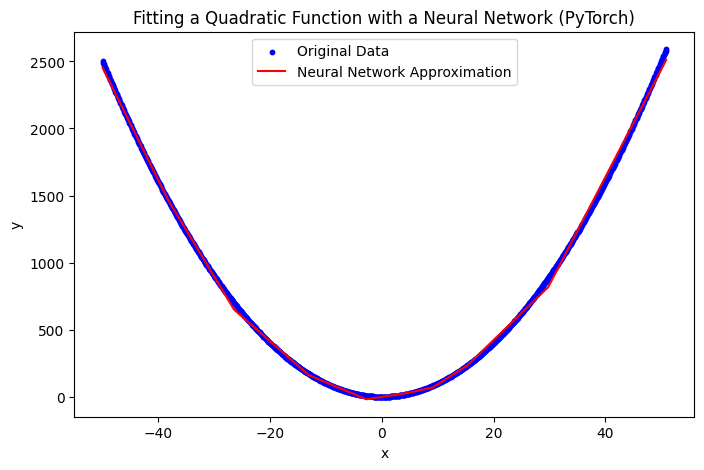

CPU times: user 967 ms, sys: 4.26 ms, total: 972 ms
Wall time: 1.01 s


In [ ]:
%%time

import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-50, 51, 0.1).reshape(-1, 1)
y = x ** 2

# normalization for easy computation
x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))
y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))

x_tensor = torch.tensor(x_norm, dtype=torch.float32)
y_tensor = torch.tensor(y_norm, dtype=torch.float32)

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 40) # hidden layer(has 40 neurons)
        self.relu = nn.ReLU() # activation function - ReLU
        self.output = nn.Linear(40, 1) # output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

model = NeuralNet() # our model
criterion = nn.MSELoss() # Mean Square Error
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam Gradient Descent

epochs = 500
for epoch in range(1,epochs+1):
    optimizer.zero_grad()  # clear previous gradients
    y_pred = model(x_tensor)  # forward pass
    loss = criterion(y_pred, y_tensor)  # compute loss
    loss.backward()  # backpropagation
    optimizer.step()  # update weights

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")

# make predictions
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

# rescaled
y_pred_rescaled = y_pred * (np.max(y) - np.min(y)) + np.min(y)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Original Data", color='blue', s=10)
plt.plot(x, y_pred_rescaled, label="Neural Network Approximation", color='red')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting a Quadratic Function with a Neural Network (PyTorch)")
plt.show()